# PyImageSearch Practice File - Image Processing Basics
https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/ -> link of tutorial

https://www.pyimagesearch.com/start-here/ -> link of home page

In [2]:
# import the necessary packages
import imutils
import cv2
import matplotlib.pyplot as plt

In [3]:
# load the input image and show its dimensions, keeping in mind that
# images are represented as a multi-dimensional NumPy array with
# shape no. rows (height) x no. columns (width) x no. channels (depth)

In [4]:
image = cv2.imread('../OpenCV_Basics/practice_image_1.jpg')

In [5]:
type(image)

numpy.ndarray

In [6]:
image.shape

(384, 600, 3)

In [7]:
h,w,d = image.shape

In [8]:
# width is the x-axis measurement - also known as columns
# height is the y-axis measurement - also known as rows
# depth denotes the color channels of the image, 3 means RGB channels.
print("width={}, height={}, depth={}".format(w, h, d))

width=600, height=384, depth=3


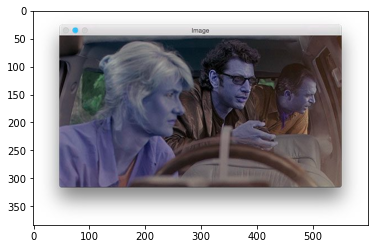

In [9]:
# displaying the image with matplotlib
# BGR image
plt.imshow(image)

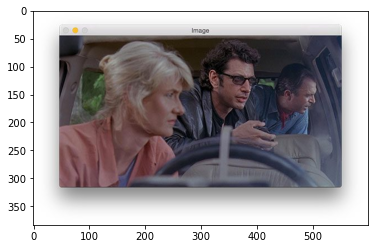

In [11]:
# displaying the image with matplotlib
# RGB image
RGB_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(RGB_image)

In [10]:
# displaying with OpenCV, this will create a separate window to display
#waitKey(0) will display the window infinitely until any keypress (it is suitable for image display).
cv2.imshow("Image", image)
cv2.waitKey(0)

-1

# Accessing individual pixels and its RGB values

In [15]:
# Pixels of an image is calculated by width*height values or x*y values
# the number of pixels in this image is
w*h 

230400

In [16]:
# each pixel of this image has some values for all three color channels RGB
# ranging from 0 to 255, in the form of a tuple
# accessing a random pixel and grabbing its BGR value
# its BGR since we are working on the non - transformed image
image[100,50]

array([19, 20, 24], dtype=uint8)

In [18]:
(B, G, R) = image[100,50]
print("R={}, G={}, B={}".format(R, G, B))

R=24, G=20, B=19


# ROI - Region Of Interest

In [19]:
# In simple words ROI means cropping the image--
#--accesing only the part of the image, which we want.
# Its done by array slicing.

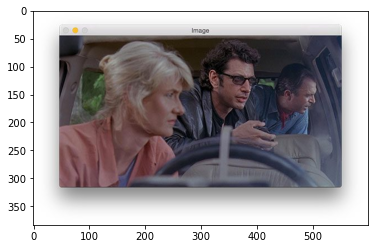

In [20]:
plt.imshow(RGB_image)

In [21]:
# image[startY:endY, startX:endX]
roi = RGB_image[50:190,300:400]

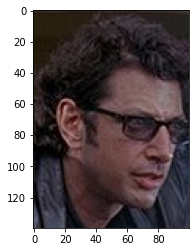

In [22]:
plt.imshow(roi)

# Resizing images

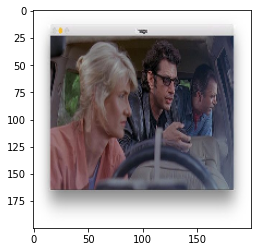

In [24]:
# This image is of size 600 x 384
# Let’s resize our original image to 200 x 200 pixels
resized_image = cv2.resize(RGB_image,(200,200))
plt.imshow(resized_image)

we have resized the RGB_image ignoring aspect ratio.the image is resized but is now distorted because we didn’t take into account the aspect ratio.

## Resizing with aspect ratio

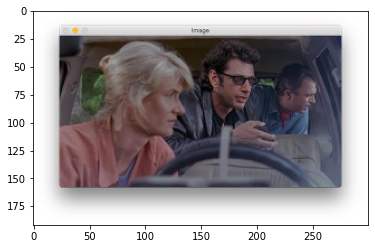

In [28]:
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(RGB_image, dim)
plt.imshow(resized)

In [30]:
RGB_image.shape

(384, 600, 3)

In [29]:
resized.shape

(192, 300, 3)

In [34]:
# Raion of width:height
width_ratio = w/h
width_ratio

1.5625

In [33]:
height_ratio = h/w
height_ratio

0.64

In [35]:
# So the aspect ratio is 1.5625 : 0.64 (width:height)

let's resize the width
to be 300px but compute the new height based on the aspect ratio

In [39]:
new_width = 300
new_height = new_width*height_ratio
new_height

192.0

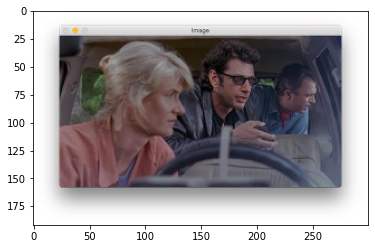

In [41]:
# we can't use float values, as the dtype of the image array is in integer.
resized_image_1 = cv2.resize(RGB_image,(300,192))
plt.imshow(resized_image_1)

Resizing images while maintaining aspect ratio with OpenCV is a three-step process: (1) extract the image dimensions, (2) compute the aspect ratio, and (3) resize the image (cv2.resize) along one dimension and multiply the other dimension by the aspect ratio.

# Resizing using the imutils library

manually computing the aspect ratio can be a pain so let's use the imutils library instead, which does the calculations for us

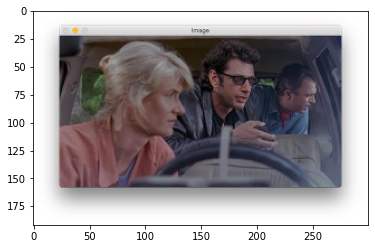

In [42]:
resized_image_2 = imutils.resize(RGB_image, width=300)
plt.imshow(resized_image_2)

# Rotating an image

Rotating an image with OpenCV about the center point requires three steps: (1) compute the center point using the image width and height, (2) compute a rotation matrix with cv2.getRotationMatrix2D, and (3) use the rotation matrix to warp the image with cv2.warpAffine.

Now let’s perform the same operation in just a single line of code using imutils

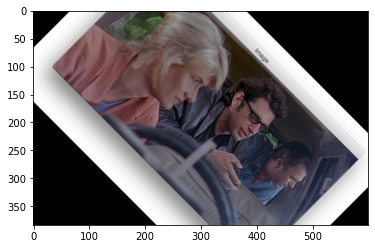

In [47]:
# The -45 means that we’ll rotate the image 45 degrees clockwise
rotated_image = imutils.rotate(RGB_image,-45)
plt.imshow(rotated_image)

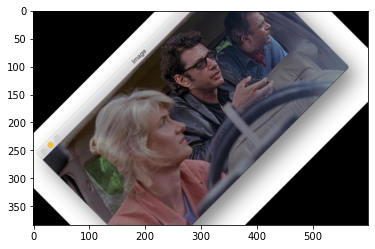

In [48]:
#The 45 means that we’ll rotate the image 45 degrees counter clockwise
rotated_image = imutils.rotate(RGB_image,45)
plt.imshow(rotated_image)

positive angles are counterclockwise and negative angles are clockwise.

In [51]:
# If we see the above results , the image doesn't fit in the frame
# so we can alter that and view the whole image by using imultils.rotate_bound

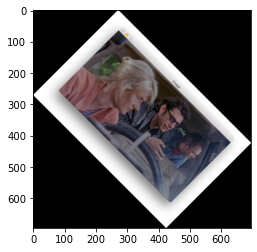

In [50]:
rotated = imutils.rotate_bound(RGB_image, 45)
plt.imshow(rotated)

# Smoothing or blurring an image